### Mushrooms Poisonability Prediction Models

- Sara Thibierge 
- Cassie Doguet
- Antonin Dussart

As we are 3 friends who likes to catch mushrooms during autumn we thought it could be interesting to know more about it.
On this notebook you will find some visualisations about mushrooms features and some predictions models to predict their poisonability.

Here is the link to the dataset we used:
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

### imported libraries and description of the dataset

In [2]:
# imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load mushrooms.csv
df = pd.read_csv('mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [4]:
# mapping the columns values of the dataframe to have a better understanding of it

class_mapping = {'e': 'edible', 'p': 'poisonous'}
cap_shape_mapping = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_mapping = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_mapping = {'t': 'bruises', 'f': 'no'}
odor_mapping = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_mapping = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_mapping = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_mapping = {'b': 'broad', 'n': 'narrow'}
gill_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape_mapping = {'e': 'enlarging', 't': 'tapering'}
stalk_root_mapping = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_mapping = {'p': 'partial', 'u': 'universal'}
veil_color_mapping = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_mapping = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_mapping = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_mapping = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat_mapping = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

attribute_mappings = {
    'class': class_mapping,
    'cap-shape': cap_shape_mapping,
    'cap-surface': cap_surface_mapping,
    'cap-color': cap_color_mapping,
    'bruises': bruises_mapping,
    'odor': odor_mapping,
    'gill-attachment': gill_attachment_mapping,
    'gill-spacing': gill_spacing_mapping,
    'gill-size': gill_size_mapping,
    'gill-color': gill_color_mapping,
    'stalk-shape': stalk_shape_mapping,
    'stalk-root': stalk_root_mapping,
    'stalk-surface-above-ring': stalk_surface_above_ring_mapping,
    'stalk-surface-below-ring': stalk_surface_below_ring_mapping,
    'stalk-color-above-ring': stalk_color_above_ring_mapping,
    'stalk-color-below-ring': stalk_color_below_ring_mapping,
    'veil-type': veil_type_mapping,
    'veil-color': veil_color_mapping,
    'ring-number': ring_number_mapping,
    'ring-type': ring_type_mapping,
    'spore-print-color': spore_print_color_mapping,
    'population': population_mapping,
    'habitat': habitat_mapping,
}

for column, mapping in attribute_mappings.items():
    df[column] = df[column].replace(mapping)



In [5]:
#display some basic information 
print(f'shape : {df.shape}')
print(f'data types : {df.dtypes}')


shape : (8124, 23)
data types : class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [6]:
# check the distribution of the target variable
print(df['class'].value_counts())

class
edible       4208
poisonous    3916
Name: count, dtype: int64


In [7]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# Display summary statistics
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown      no  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           close     broad       buff  ...                   smooth   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                     white                  white   partial      white   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top            one   pendant             white    several   woods  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

### Visualisations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


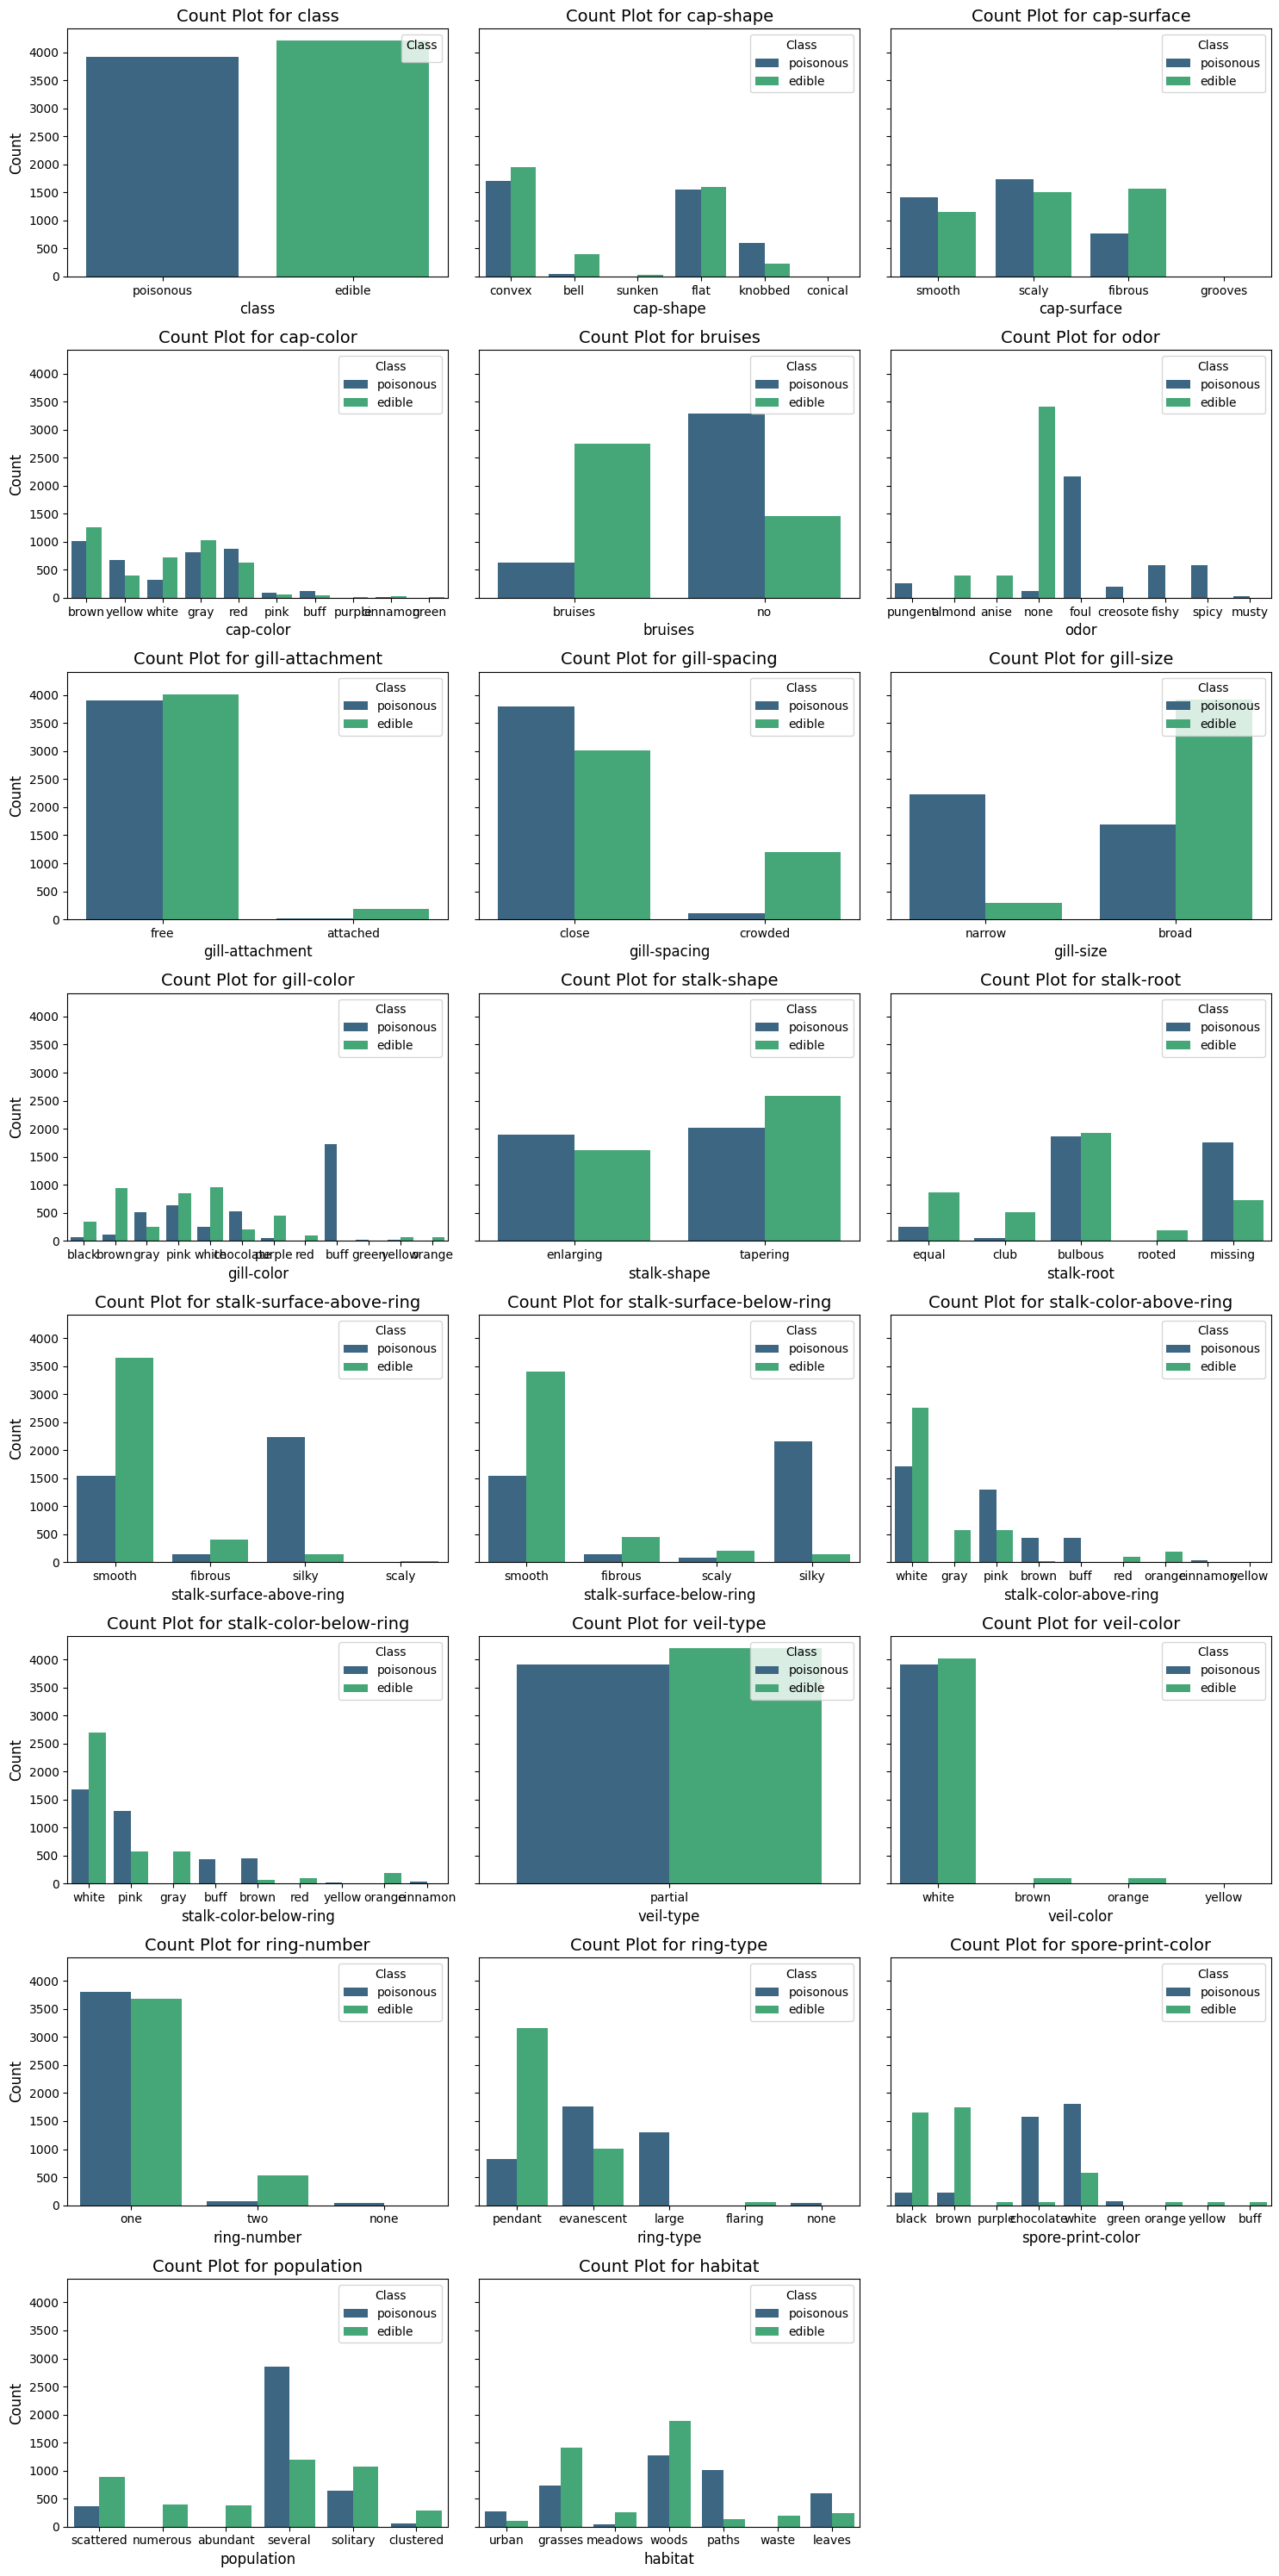

In [9]:

# Set the number of columns for the subplot grid
num_cols = 3
num_rows = len(df.columns) // num_cols + (len(df.columns) % num_cols > 0)

# Create subplots with a consistent style
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing

# Flatten the axes for easy iteration
axes = axes.flatten()

# Set a consistent color palette
palette = sns.color_palette("viridis", n_colors=len(df['class'].unique()))

# Loop through columns and create count plots
for i, col in enumerate(df.columns):
    sns.countplot(x=col, hue='class', data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Count Plot for {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Class', loc='upper right', fontsize=10)

# Remove empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [10]:
# drop some columns
df.drop(['ring-type', 'spore-print-color','gill-attachment','veil-type','veil-color','ring-number'], axis=1, inplace=True)
# drop values
#df.drop(df[df['class'] == 'p'].index, inplace=True)

C:\Users\sarat\AppData\Local\Temp\ipykernel_33396\193094947.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\sarat\AppData\Local\Temp\ipykernel_33396\193094947.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\sarat\AppData\Local\Temp\ipykernel_33396\193094947.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\sarat\AppData\Local\Temp\ipykernel_33396\193094947.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

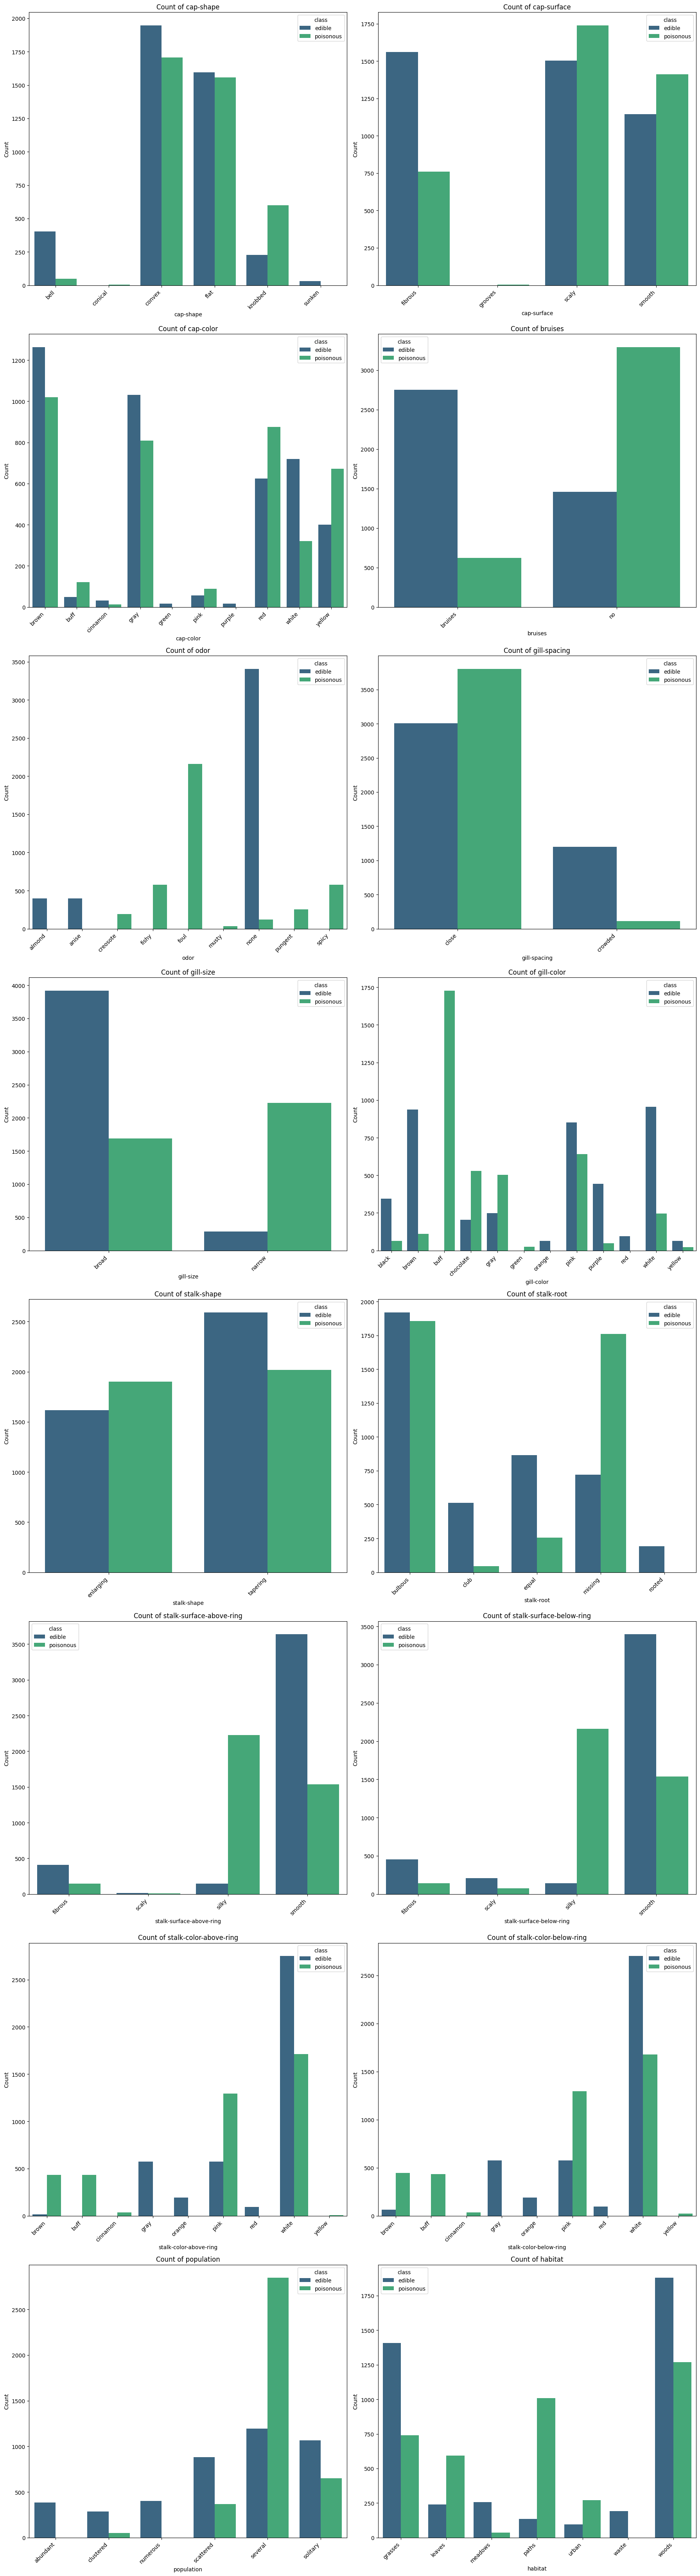

In [11]:
def plot_count(x,ax):
    group = df.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')
cols = df.columns.tolist()
fig, axes = plt.subplots(8, 2, figsize=(18, 6 * 11))

for index,column in enumerate(cols[1:]):
    row = index // 2 
    col = index % 2
    ax = axes[row,col]
    plot_count(column, ax)
    
plt.tight_layout()
plt.show()

In [12]:
# transform df to numericals values
df = pd.get_dummies(df,dtype=float,drop_first=True)
df.head()

class_poisonous  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0              1.0                0.0               1.0             0.0   
1              0.0                0.0               1.0             0.0   
2              0.0                0.0               0.0             0.0   
3              1.0                0.0               1.0             0.0   
4              0.0                0.0               1.0             0.0   

   cap-shape_knobbed  cap-shape_sunken  cap-surface_grooves  \
0                0.0               0.0                  0.0   
1                0.0               0.0                  0.0   
2                0.0               0.0                  0.0   
3                0.0               0.0                  0.0   
4                0.0               0.0                  0.0   

   cap-surface_scaly  cap-surface_smooth  cap-color_buff  ...  \
0                0.0                 1.0             0.0  ...   
1                0.0                 1.0             0.0  ...   
2                0.0                 1.0             0.0  ...   
3                1.0                 0.0             0.0  ...   
4                0.0                 1.0             0.0  ...   

   population_numerous  population_scattered  population_several  \
0                  0.0                   1.0                 0.0   
1                  1.0                   0.0                 0.0   
2                  1.0                   0.0                 0.0   
3                  0.0                   1.0                 0.0   
4                  0.0                   0.0                 0.0   

   population_solitary  habitat_leaves  habitat_meadows  habitat_paths  \
0                  0.0             0.0              0.0            0.0   
1                  0.0             0.0              0.0            0.0   
2                  0.0             0.0              1.0            0.0   
3                  0.0             0.0              0.0            0.0   
4                  0.0             0.0              0.0            0.0   

   habitat_urban  habitat_waste  habitat_woods  
0            1.0            0.0            0.0  
1            0.0            0.0            0.0  
2            0.0            0.0            0.0  
3            1.0            0.0            0.0  
4            0.0            0.0            0.0  

[5 rows x 78 columns]

<Axes: >

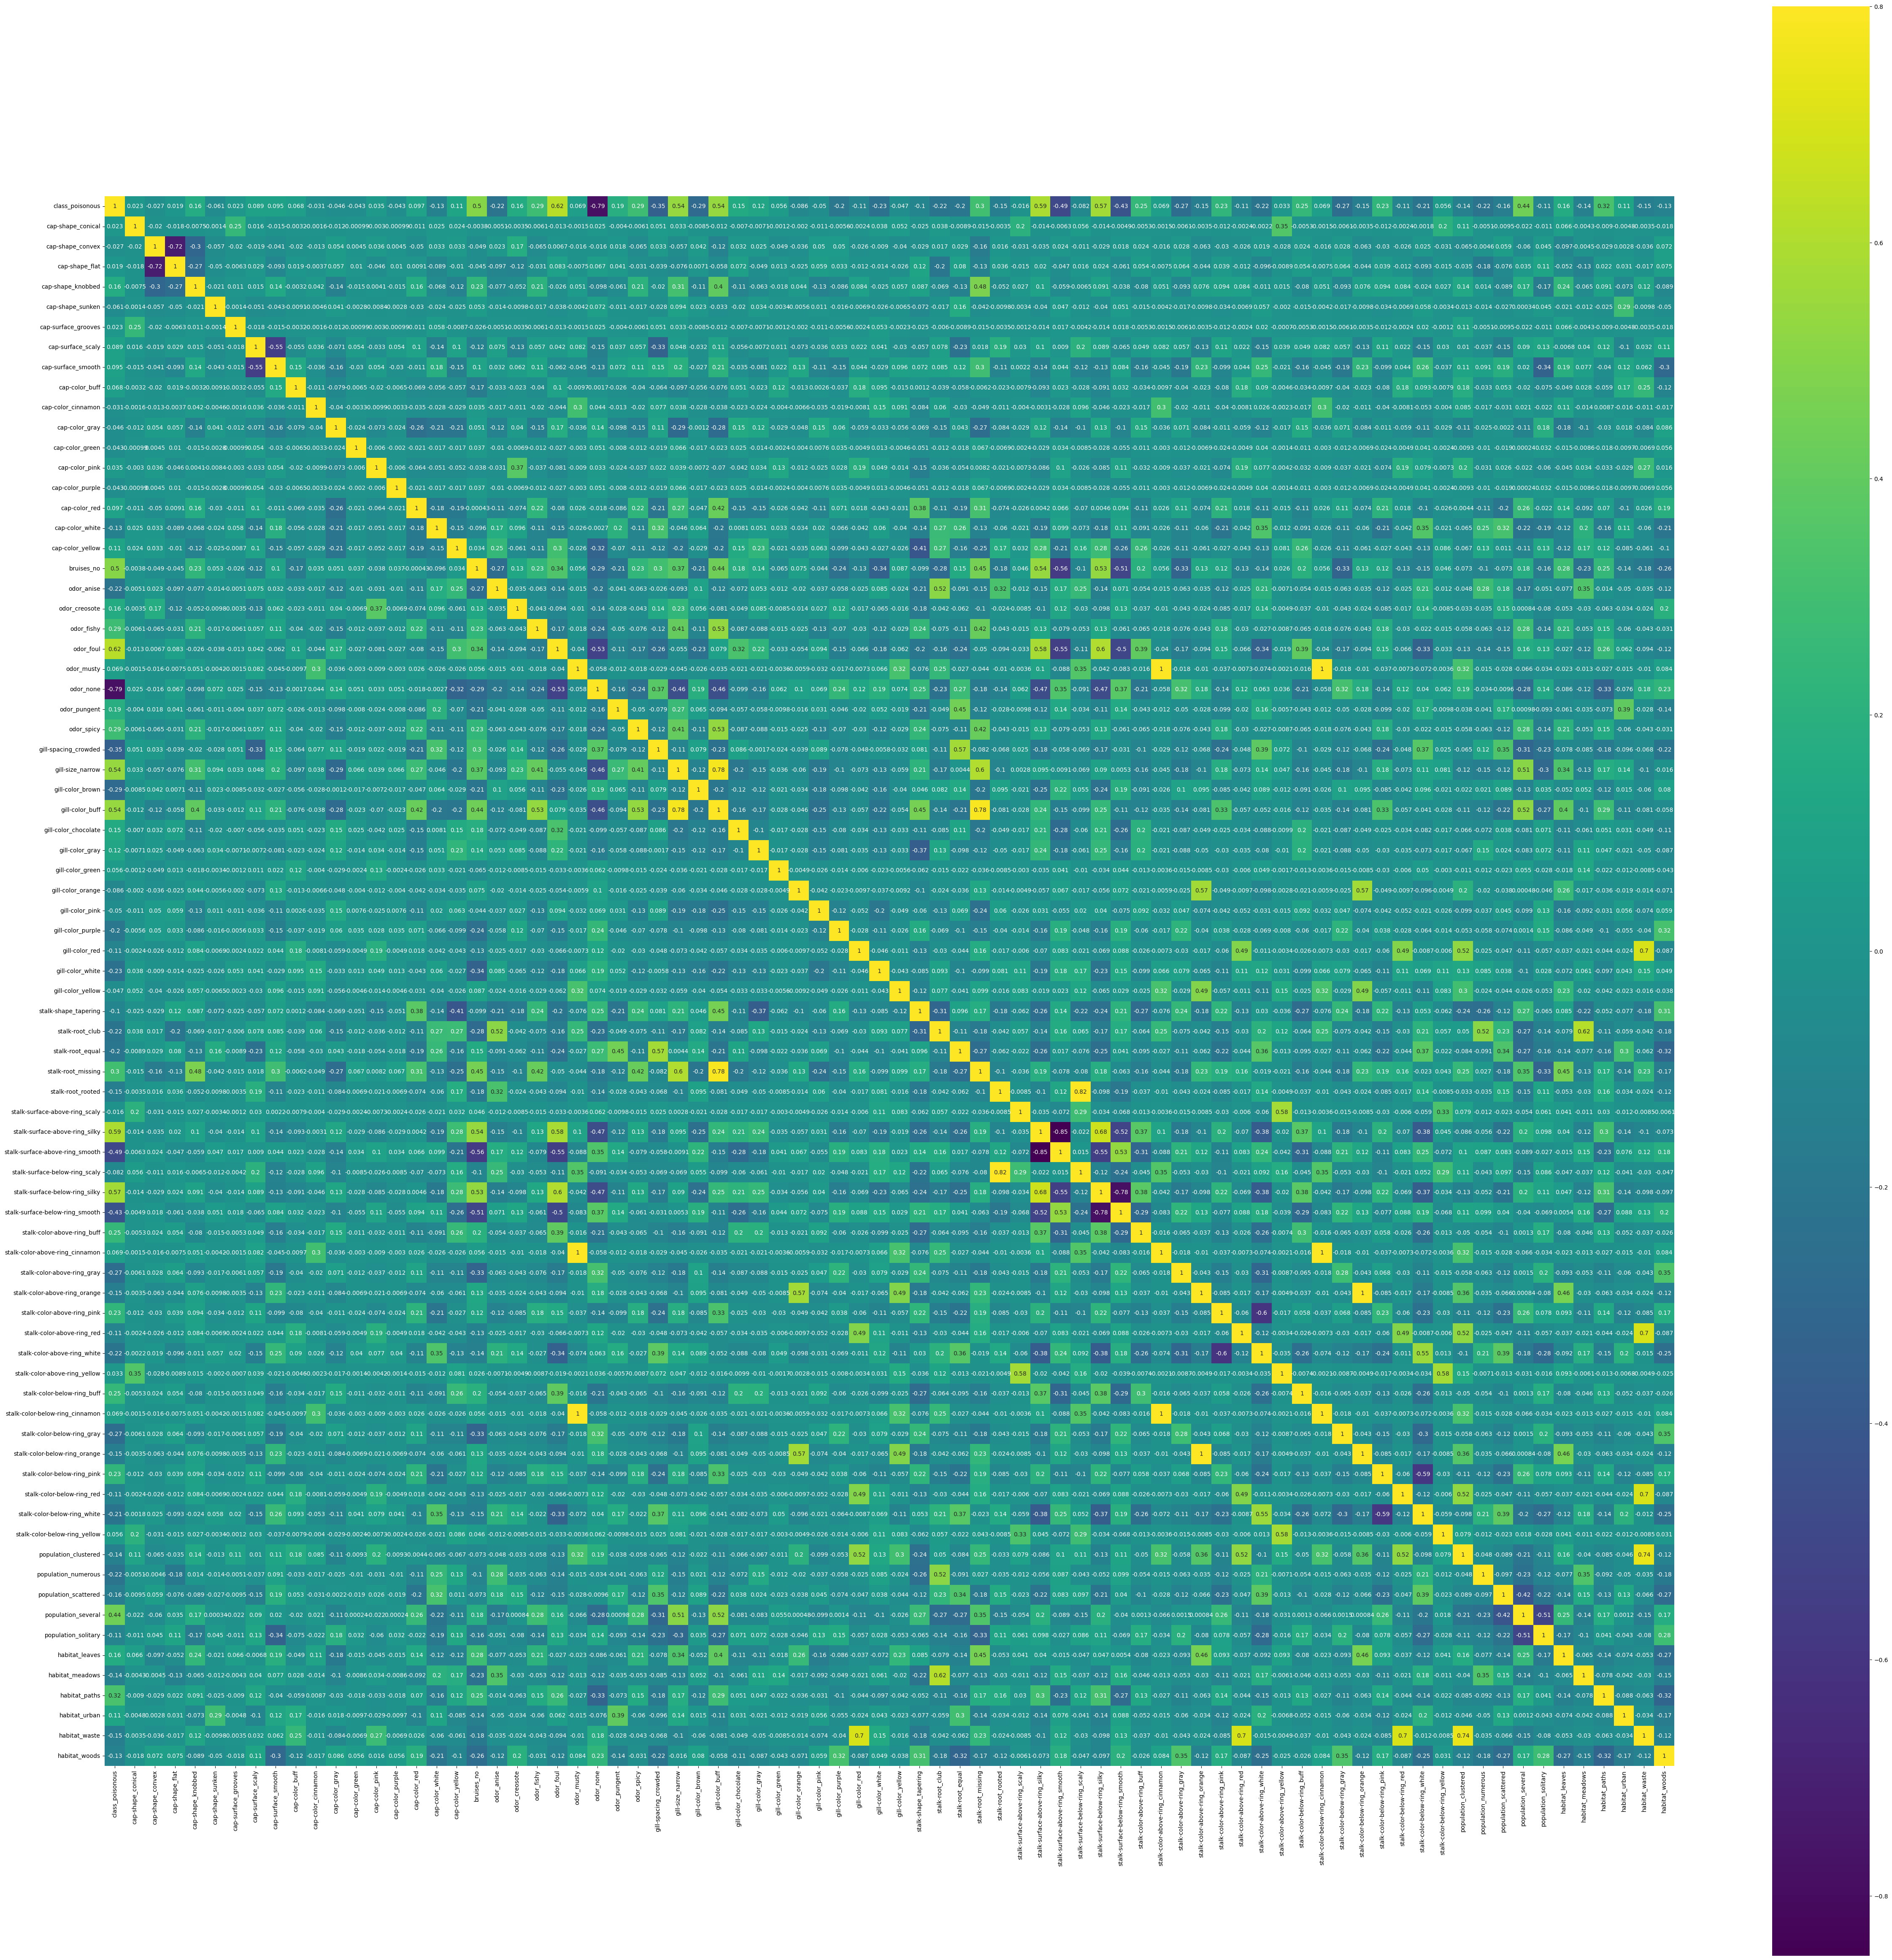

In [13]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(),vmax=.8, annot=True,square=True,cmap='viridis')

### Predictions Models

#### Random Forest Classifier 

Random Forests can capture complex nonlinear relationships between input features and the target variable. This makes them suitable for a wide range of real-world datasets.

Random Forests generally provide high accuracy in classification tasks. They are capable of handling both numerical and categorical features and can capture complex relationships within the data.

Random Forests are less prone to overfitting compared to individual decision trees. 


In [26]:
# splitting data
X = df.drop(['class_poisonous'],axis = 1)
y = df['class_poisonous']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [27]:
# making a random forest classifier model
random_forest = RandomForestClassifier(n_estimators=100)
# fit the model
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred = random_forest.predict(X_test)
rdm_train_acc = round(accuracy_score(y_train,random_forest.predict(X_train))*100)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100)
print('Training Accuracy = ' , rdm_train_acc,'%')
print('Testing Accuracy = ' , rdm_test_acc,'%')

Training Accuracy =  100 %
Testing Accuracy =  100 %


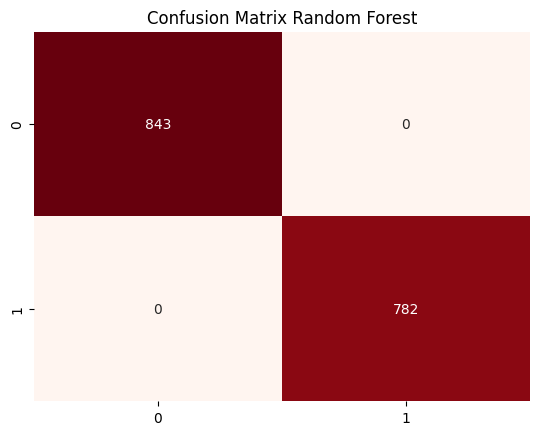

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Confusion Matrix Random Forest")
plt.show()

In [54]:
import plotly.express as px

# Assuming your_model is your trained Random Forest model
feature_importances = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Select the top 10 features
top_n = 10
top_features = X.columns[sorted_idx][:top_n]
top_feature_importances = feature_importances[sorted_idx][:top_n]

# Calculate percentage importance
total_importance = np.sum(top_feature_importances)
percentage_importance = (top_feature_importances / total_importance) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({"Feature": top_features, "Importance": percentage_importance})

# Plotting top N feature importance using Plotly
fig = px.bar(plot_data, x="Feature", y="Importance", text="Importance",
             title="Top 10 Feature Importance",
             labels={"Importance": "Percentage Importance"},
             color="Importance",
             color_continuous_scale=px.colors.sequential.Viridis,
             height=500)

# Customize layout
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage Importance", title_x=0.5)

# Show the interactive plot
fig.show()


In [56]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(random_forest, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.84246154 1.         0.992      1.         0.72660099]
Mean Cross-Validation Score: 0.9122125047366427


### Knn et autre méthode

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


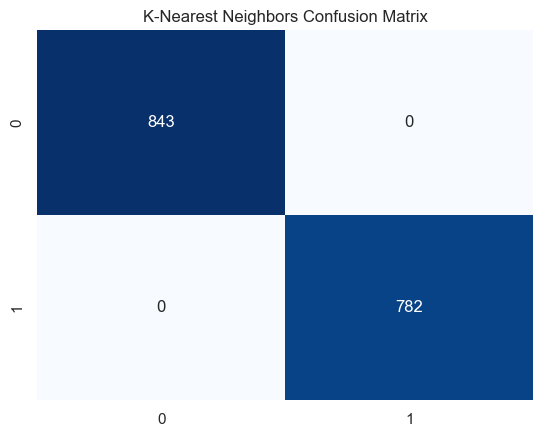

In [ ]:

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , knn_train_acc,' %')
print('Testing Accuracy = ' , knn_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix');


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Training Accuracy =  99.94  %
Testing Accuracy =  100.0  %


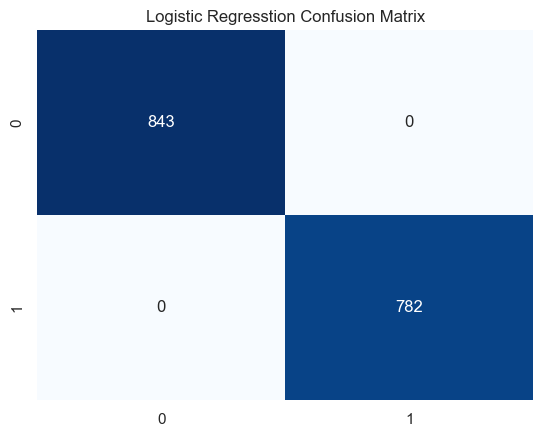

In [ ]:


y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');



In [ ]:


nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
nn_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
history = nn_model.fit(X_train,y_train,epochs=10)



Epoch 1/10
204/204 [==============================] - 1s 908us/step - loss: 0.3393 - accuracy: 0.8712
Epoch 2/10
204/204 [==============================] - 0s 855us/step - loss: 0.0548 - accuracy: 0.9838
Epoch 3/10
204/204 [==============================] - 0s 896us/step - loss: 0.0246 - accuracy: 0.9925
Epoch 4/10
204/204 [==============================] - 0s 859us/step - loss: 0.0132 - accuracy: 0.9971
Epoch 5/10
204/204 [==============================] - 0s 954us/step - loss: 0.0077 - accuracy: 0.9983
Epoch 6/10
204/204 [==============================] - 0s 899us/step - loss: 0.0048 - accuracy: 0.9991
Epoch 7/10
204/204 [==============================] - 0s 871us/step - loss: 0.0033 - accuracy: 0.9995
Epoch 8/10
204/204 [==============================] - 0s 911us/step - loss: 0.0021 - accuracy: 0.9997
Epoch 9/10
204/204 [==============================] - 0s 865us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
204/204 [==============================] - 0s 906us/step - loss: 0.001

In [ ]:
nn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 5)                 390       
                                                                 
 dense_45 (Dense)            (None, 5)                 30        
                                                                 
 dense_46 (Dense)            (None, 5)                 30        
                                                                 
 dense_47 (Dense)            (None, 1)                 6         
                                                                 
Total params: 456 (1.78 KB)
Trainable params: 456 (1.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


204/204 [==============================] - 0s 676us/step
Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


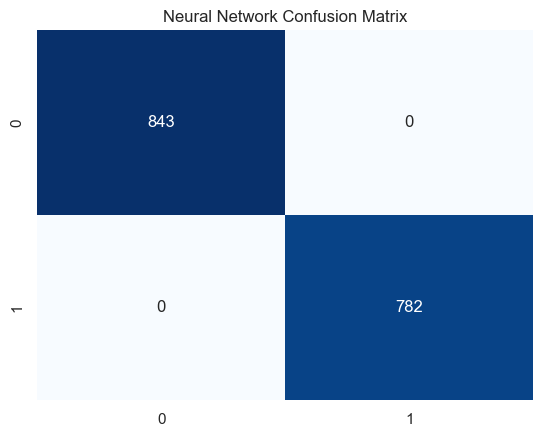

In [ ]:
y_pred = nn_model.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
nn_train_acc = round(accuracy_score(y_train,np.round(nn_model.predict(X_train)))*100,2)
nn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , nn_train_acc,' %')
print('Testing Accuracy = ' , nn_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Neural Network Confusion Matrix');